In [1]:
# Import our dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48 kB 3.2 MB/s 


In [3]:
import FinanceDataReader as fdr

In [4]:
# #Reading the Database GOOG(GOOG)
google = fdr.DataReader('GOOG')

In [5]:
google.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2022-05-23,2233.33,2202.08,2240.11,2183.08,1530000.0,0.0215
2022-05-24,2118.52,2127.55,2127.90,2044.16,3010000.0,-0.0514
2022-05-25,2116.79,2102.84,2130.89,2084.23,1870000.0,-0.0008
2022-05-26,2165.92,2121.01,2179.10,2109.76,1510000.0,0.0232
2022-05-27,2255.98,2195.77,2255.98,2191.23,1500000.0,0.0416


In [6]:
# GOOG(GOOG)
google = fdr.DataReader('GOOG', '2014')

In [7]:
google.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2014-03-28,558.46,559.66,564.88,557.14,41120.0,0.0027
2014-03-31,555.45,565.34,565.45,555.41,10800.0,-0.0054
2014-04-01,565.61,557.18,566.89,557.18,7950.0,0.0183
2014-04-02,565.45,598.35,603.17,560.65,147100.0,-0.0003
2014-04-03,568.18,568.29,585.67,562.59,5100000.0,0.0048


In [8]:
# Find the 'GOOG' data from the data between 2000-01-01 ~ 2020-12-30 (20years data)
google = fdr.DataReader('G', '2000-01-01', '2020-12-30')

In [9]:
google.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2020-12-23,41.76,42.05,42.16,41.53,968600.0,-0.0010
2020-12-24,41.75,41.88,41.89,41.48,323260.0,-0.0002
2020-12-28,41.55,41.99,42.25,41.54,470690.0,-0.0048
2020-12-29,41.10,41.85,41.85,41.08,474560.0,-0.0108
2020-12-30,41.23,41.21,41.55,41.12,419030.0,0.0032


In [10]:
# checj DatetimeIndex
google.index

DatetimeIndex(['2007-08-02', '2007-08-03', '2007-08-06', '2007-08-07',
               '2007-08-08', '2007-08-09', '2007-08-10', '2007-08-13',
               '2007-08-14', '2007-08-15',
               ...
               '2020-12-16', '2020-12-17', '2020-12-18', '2020-12-21',
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-28',
               '2020-12-29', '2020-12-30'],
              dtype='datetime64[ns]', name='Date', length=3378, freq=None)

In [11]:
# Setting the dataframe based on the year, month and day
google['Year'] = google.index.year
google['Month'] = google.index.month
google['Day'] = google.index.day

In [12]:
google.head()

,Close,Open,High,Low,Volume,Change,Year,Month,Day
Date,,,,,,,,,
2007-08-02,16.75,14.00,17.10,13.63,18500000.0,-0.5779,2007,8,2
2007-08-03,15.75,16.30,17.00,15.25,1700000.0,-0.0597,2007,8,3
2007-08-06,16.18,15.80,16.19,15.28,852900.0,0.0273,2007,8,6
2007-08-07,17.00,16.03,17.00,15.98,694200.0,0.0507,2007,8,7
2007-08-08,16.50,17.01,17.44,16.15,1260000.0,-0.0294,2007,8,8


Text(0, 0.5, 'price')

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


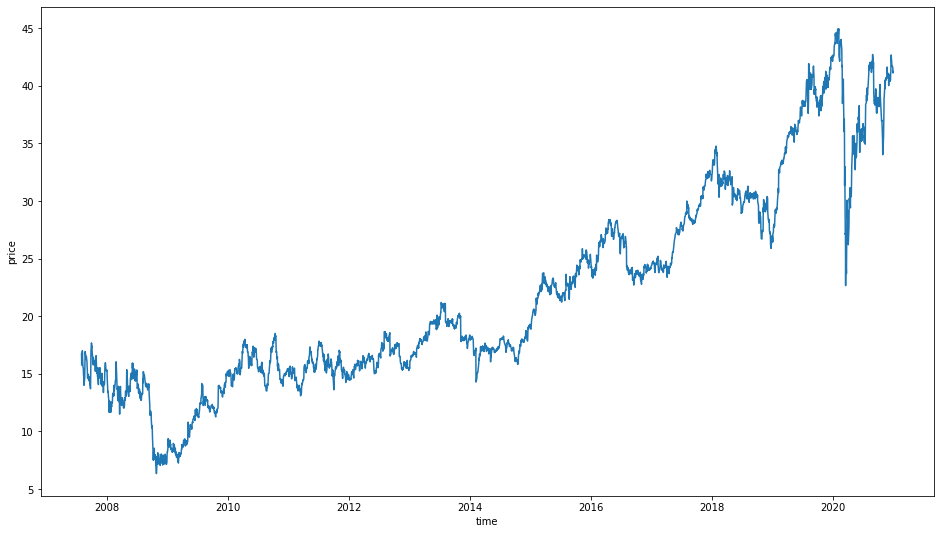

In [13]:
# make visual plot chart
plt.figure(figsize=(16, 9))
sns.lineplot(y=google['Close'], x=google.index)
plt.xlabel('time')
plt.ylabel('price')

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


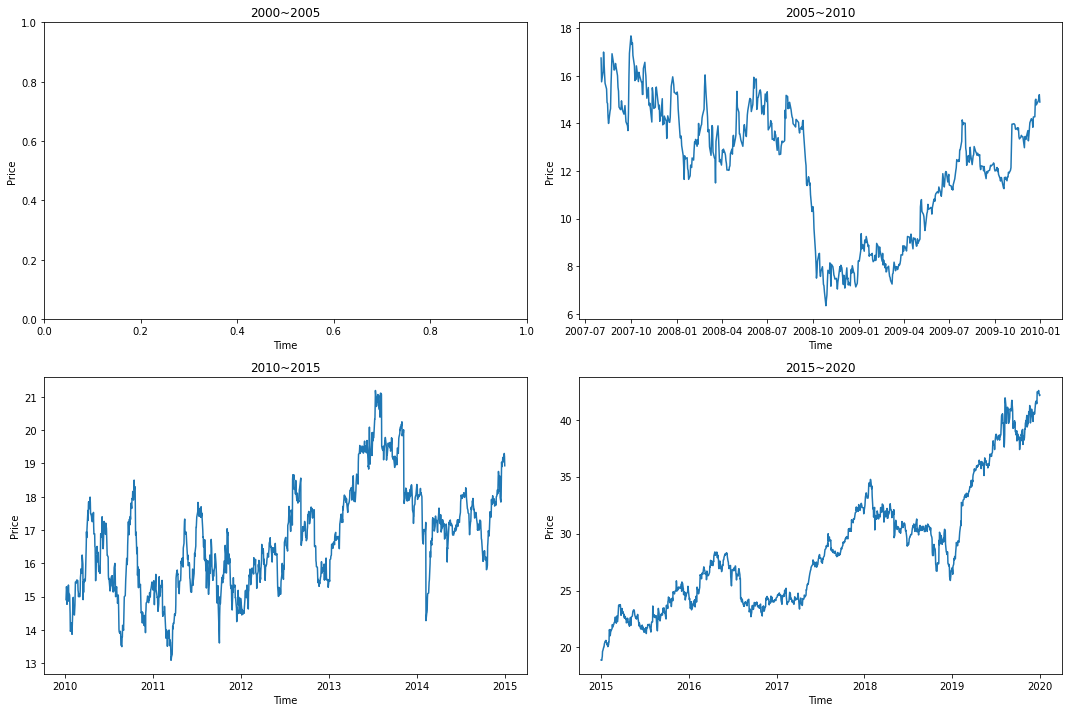

In [14]:
# Make visual charts in one chart

time_frame = [['2000', '2005'], 
              ['2005', '2010'], 
              ['2010', '2015'], 
              ['2015', '2020']]

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(15, 10)
for i in range(4):
    ax = axes[i//2, i%2]
    df = google.loc[(google.index > time_frame[i][0]) & (google.index < time_frame[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{time_frame[i][0]}~{time_frame[i][1]}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Price')
plt.tight_layout()
plt.show()

In [15]:
# pre-processing by using scikit-learn package
# normalization for training deep learning about the stock data
# organize dataset within 5 columns based on datetime in dataframe.
# use MinMaxScaler because the stock price has negative values (-1 etc.) usually standard scaler starts from 0 to 1

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# define scaled columns
scaled_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
# after scaled columns
scaled_value = scaler.fit_transform(google[scaled_cols])
scaled_value

array([[0.19543805, 0.26708399, 0.18999482, 0.26968912, 0.79756736],
       [0.25505443, 0.26447574, 0.23198548, 0.24378238, 0.07243549],
       [0.24209435, 0.24334898, 0.23276309, 0.25492228, 0.03587245],
       ...,
       [0.92094349, 0.92305686, 0.91342665, 0.91217617, 0.01937526],
       [0.91731467, 0.91262389, 0.90150337, 0.90051813, 0.0195423 ],
       [0.90072576, 0.90479917, 0.90254018, 0.90388601, 0.01714548]])

In [16]:
df = pd.DataFrame(scaled_value, columns=scaled_cols)

In [17]:
#train / test 
# Split our preprocessed data into our features and target arrays
from sklearn.model_selection import train_test_split

In [18]:
# Split the preprocessed data into a training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(df.drop('Close', 1), df['Close'], test_size=0.2, random_state=0, shuffle=False)

In [19]:
x_train.shape, y_train.shape

((2702, 4), (2702,))

In [20]:
x_test.shape, y_test.shape

((676, 4), (676,))

In [21]:
x_train

,Open,High,Low,Volume
0,0.195438,0.267084,0.189995,0.797567
1,0.255054,0.264476,0.231985,0.072435
2,0.242094,0.243349,0.232763,0.035872
3,0.248056,0.264476,0.250907,0.029023
4,0.273458,0.275952,0.255314,0.053444
...,...,...,...,...
2697,0.674443,0.672405,0.673147,0.011136
2698,0.669777,0.666927,0.667963,0.008932
2699,0.668222,0.663276,0.664593,0.010021
2700,0.667185,0.660929,0.655262,0.013841


In [22]:
import tensorflow as tf

In [23]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    data_set = tf.data.Dataset.from_tensor_slices(series)
    data_set = data_set.window(window_size + 1, shift=1, drop_remainder=True)
    data_set = data_set.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        data_set = data_set.shuffle(1000)
    data_set = data_set.map(lambda w: (w[:-1], w[-1]))
    return data_set.batch(batch_size).prefetch(1)

In [24]:
window=20
batch=32

In [25]:
# trian_data is for train dataset, test_data is for prediction
train_data_set = windowed_dataset(y_train, window, batch, True)
test_data_set = windowed_dataset(y_test, window, batch, False)

In [26]:

# X: (batch, window, feature)
# Y: (batch, feature)
for data in train_data_set.take(1):
    print(f'dataset(X) composed (batch, window, feature): {data[0].shape}')
    print(f'dataset(Y) composed (batch, feature): {data[1].shape}')

dataset(X) composed (batch, window, feature): (32, 20, 1)
dataset(Y) composed (batch, feature): (32, 1)


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[window, 1]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

In [28]:
# use huber() for better performance for Sequence
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['accuracy'])

In [29]:
# order to stop reading the data if there is no val_loss within 10 times of epoch in earlystopping
earlystopping = EarlyStopping(monitor='val_loss', patience=20)

# create checkpoint for standard of val_loss
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
check = ModelCheckpoint(filename,
                             save_weights_only=True,
                             save_best_only=True,
                             monitor='val_loss',
                             verbose=1)

In [33]:
history = model.fit(test_data_set, 
                    validation_data=(test_data_set), 
                    epochs=50, 
                    callbacks=[check, earlystopping])

Epoch 1/50
     17/Unknown - 4s 10ms/step - loss: 0.2664 - accuracy: 0.0000e+00
Epoch 1: val_loss improved from inf to 0.22249, saving model to tmp/ckeckpointer.ckpt
21/21 [==============================] - 4s 49ms/step - loss: 0.2726 - accuracy: 0.0000e+00 - val_loss: 0.2225 - val_accuracy: 0.0000e+00
Epoch 2/50
16/21 [=====================>........] - ETA: 0s - loss: 0.1672 - accuracy: 0.0000e+00
Epoch 2: val_loss improved from 0.22249 to 0.10561, saving model to tmp/ckeckpointer.ckpt
21/21 [==============================] - 0s 18ms/step - loss: 0.1648 - accuracy: 0.0000e+00 - val_loss: 0.1056 - val_accuracy: 0.0000e+00
Epoch 3/50
17/21 [=======================>......] - ETA: 0s - loss: 0.0569 - accuracy: 0.0018    
Epoch 3: val_loss improved from 0.10561 to 0.01385, saving model to tmp/ckeckpointer.ckpt
21/21 [==============================] - 0s 18ms/step - loss: 0.0531 - accuracy: 0.0015 - val_loss: 0.0139 - val_accuracy: 0.0015
Epoch 4/50
16/21 [=====================>........] - 

In [34]:
# load saved ModelCheckpoint
model.load_weights(filename)

In [36]:
# process to predict by using test_data
predict = model.predict(test_data_set)

In [37]:
predict.shape

(656, 1)

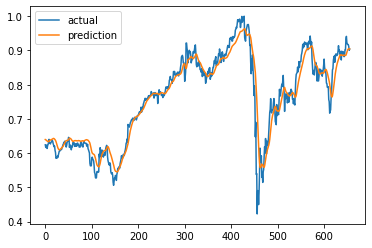

In [39]:
# 아래 시각화 코드중 y_test 데이터에 [20:]으로 슬라이싱을 한 이유는
#예측 데이터에서 20일치의 데이터로 21일치를 예측해야하기 때문에 test_data로 예측 시 앞의 20일은 예측하지 않습니다.
# 따라서, 20번 째 index와 비교하면 더욱 정확합니다.plt.figure(figsize=(12, 9))
# 숫자 0-600은 일수를 말하고, 0-1.0은 스케이이 된 주가의 값을 말한다. 수를 0-1까지 지정했기때문에
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(predict, label='prediction')
plt.legend()
plt.show()

In [40]:
np.asarray(y_test).shape

(676,)